In [1]:
"""
This notebook was used to test some of the functions for taskwise regression and full_data regression
Also for some preliminary analysis of the average performance data
"""

import pandas as pd
from IPython.core.display_functions import display
data = pd.read_csv('./data/xgboost_meta_data.csv')
# 6 million rows - original
print("Original metadata \n")
display(data)
# Only one feature with missing values
print("Number of missing values per feature\n")
display(data.isna().sum())

In [ ]:
#training tasks have between 18.916 and 61.258 evaluated runs
print("Number of runs available per task\n")
display(data.groupby(by=['task_id']).count().sort_values(by=['num_round'],ascending = False))

In [ ]:
"""
Now we look at the average performance of each (configuration,dataset) pair
"""
data = pd.read_csv('./data/average_performance.csv')
#training tasks have between 1657 and 10.954 unique configurations evaluated
display(data.groupby(by=['data_id']).count().sort_values(by=['num_round'],ascending = False))

In [25]:
"""
Limiting the average training time to 10 minutes keeps most of the configurations in the dataset
This is later used when filtering the data for taskwise regrression
"""
data_timelimit = data[data['avg_time']<10*60]
print(data.shape, data_timelimit.shape)
#After limiting the avg_time we get between 1155 and 10.954 unique configurations per task
display(data_timelimit.groupby(by=['data_id']).count().sort_values(by=['num_round'],ascending = False))

(687101, 14) (679321, 14)


,index,num_round,eta,gamma,lambda,alpha,subsample,max_depth,min_child_weight,colsample_bytree,colsample_bylevel,avg_auc,avg_time
data_id,,,,,,,,,,,,,
312,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954
1040,10738,10738,10738,10738,10738,10738,10738,10738,10738,10738,10738,10738,10738
1487,10601,10601,10601,10601,10601,10601,10601,10601,10601,10601,10601,10601,10601
40900,10471,10471,10471,10471,10471,10471,10471,10471,10471,10471,10471,10471,10471
41143,10176,10176,10176,10176,10176,10176,10176,10176,10176,10176,10176,10176,10176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876
1457,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553
40927,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392


In [34]:
from python.project_utils import get_dataset_to_task,get_average_performance

task_dict = get_dataset_to_task()
data_timelimit['task_id'] = data_timelimit['data_id'].map(task_dict)
display(data_timelimit)

ImportError: cannot import name 'get_average_performance' from 'python.project_utils' (C:\Users\Korisnik\Desktop\metalearning_xgboost\python\project_utils.py)

In [2]:
"""
    Testing get_average_performance with per_task=True, so instead of a single dataframe we get a dictionary of dataframes
    with the key being the task_id of a training dataset
"""
from python.project_utils import get_dataset_to_task,get_average_performance
avg_perf = get_average_performance(per_task=True)

{3:       data_id  num_round       eta     gamma     lambda       alpha  \
 0           3          1  0.000097  0.002120   1.074280  156.026000   
 1           3          1  0.000200  0.014477   0.001188    0.971001   
 2           3          1  0.001281  0.000142   0.000156    0.012087   
 3           3          1  0.001911  0.021976   0.009044    0.002017   
 4           3          1  0.002022  0.000058   0.258957    1.867090   
 ...       ...        ...       ...       ...        ...         ...   
 9945        3       5749  0.028359  0.000032   0.018361    0.007791   
 9946        3       5845  0.131354  0.010094   0.003000    0.439140   
 9947        3       5865  0.003243  0.000045   0.340472   18.326600   
 9948        3       5887  0.010789  0.002366  21.107800    0.076290   
 9949        3       5917  0.081559  4.644440   0.001400    0.253718   
 
       subsample  max_depth  min_child_weight  colsample_bytree  \
 0      0.202192          2         16.668800          0.442926 

In [3]:
display(avg_perf.keys())

dict_keys([3, 6, 11, 12, 14, 15, 18, 23, 24, 28, 29, 32, 37, 3021, 41, 43, 45, 49, 53, 58, 219, 2073, 3481, 3022, 3485, 3510, 3512, 3549, 3560, 3561, 3573, 3893, 3902, 3903, 3904, 3917, 3918, 3945, 10090, 14965, 10093, 10101, 9981, 9985, 9986, 9970, 9976, 9977, 9978, 9956, 9957, 9960, 9964, 9946, 7592, 9910, 34539, 14952, 14969, 168339, 125920, 146606, 167120, 125921, 145681, 125922, 146607, 146195, 167140, 167141, 168759, 167121, 167124, 146800, 146821, 146824, 146818, 146817, 146820, 146822, 146819, 168765, 168764, 168761, 168335, 168767, 168768, 168337, 168338, 168770, 168760, 168331, 168330, 168329])

In [4]:
"""
    Average performance for task_id = 3 - training data
"""
display(avg_perf[3])

,data_id,num_round,eta,gamma,lambda,alpha,subsample,max_depth,min_child_weight,colsample_bytree,colsample_bylevel,avg_auc,avg_time,task_id
0,3,1,0.000097,0.002120,1.074280,156.026000,0.202192,2,16.668800,0.442926,0.435029,0.500000,0.264143,3
1,3,1,0.000200,0.014477,0.001188,0.971001,0.186941,7,1.547140,0.644196,0.558417,0.884843,0.280833,3
2,3,1,0.001281,0.000142,0.000156,0.012087,0.367161,12,1.027290,0.223957,0.909821,0.725330,0.240000,3
3,3,1,0.001911,0.021976,0.009044,0.002017,0.876026,14,1.951150,0.355134,0.076143,0.500000,0.335000,3
4,3,1,0.002022,0.000058,0.258957,1.867090,0.354213,4,2.447190,0.239795,0.874333,0.866785,0.246500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,3,5749,0.028359,0.000032,0.018361,0.007791,0.569283,13,2.053570,0.332356,0.825170,0.999335,24.884750,3
9946,3,5845,0.131354,0.010094,0.003000,0.439140,0.403850,1,233.686000,0.214519,0.663293,0.500000,9.541000,3
9947,3,5865,0.003243,0.000045,0.340472,18.326600,0.394949,6,6.671510,0.051653,0.785170,0.978744,10.782600,3
9948,3,5887,0.010789,0.002366,21.107800,0.076290,0.241146,12,61.870400,0.537502,0.805439,0.757829,14.016500,3


In [14]:
"""
    Sanity check on the trained models from taskRegression.py
"""
import pickle
with open('taskwise_models.pkl', 'rb') as f:
    models_new = pickle.load(f)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8858118162868935,
             enable_categorical=False, eta=0.8505635404044724, gamma=0,
             gpu_id=-1, importance_type=None, interaction_constraints='',
             learning_rate=0.06234557918260022, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=143, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6534642143327124, tree_method='exact',
             validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6887276700546747,
             enable_categorical=False, eta=0.8828201915080831, gamma=0,
             gpu_id=-1, importance_type=None, interaction_constraints='',
        

In [23]:
"""
    Regression model that was trained on dataset with task_id 6
"""
print(models_new[6].predict([[	1,	0.099818,	0.028129,	0.001607,	0.001102,	0.821261,	14,	8.48476,	0.245569,	0.451169]]))
display(avg_perf[6])

[0.8494831]


,data_id,num_round,eta,gamma,lambda,alpha,subsample,max_depth,min_child_weight,colsample_bytree,colsample_bylevel,avg_auc,avg_time,task_id
9950,6,1,0.024234,0.000067,1.000500,768.603000,0.641650,5,4.64789,0.561103,0.167461,0.500000,0.57750,6
9951,6,1,0.099818,0.028129,0.001607,0.001102,0.821261,14,8.48476,0.245569,0.451169,0.843565,4.34350,6
9952,6,1,0.101048,0.000067,3.301350,0.119235,0.618137,3,106.53300,0.702793,0.850884,0.864983,0.74610,6
9953,6,1,0.139589,2.918780,0.326829,196.354000,0.786081,4,40.70170,0.516169,0.952272,0.854778,0.56010,6
9954,6,2,0.004823,0.002550,0.016822,5.293030,0.661372,15,5.38856,0.952915,0.840901,0.976389,1.54355,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11828,6,3520,0.168119,0.005091,0.001530,4.427620,0.755557,7,12.01180,0.256184,0.046136,0.998837,451.21480,6
11829,6,4127,0.669168,0.002332,87.110400,0.000502,0.102350,15,51.71450,0.323692,0.122990,0.946679,398.70570,6
11830,6,4180,0.504788,0.000805,416.362000,690.390000,0.584915,4,2.18529,0.118481,0.510327,0.500000,368.32790,6
11831,6,4658,0.075037,0.000673,0.007150,601.580000,0.430539,5,10.52920,0.788015,0.523482,0.500000,515.37045,6


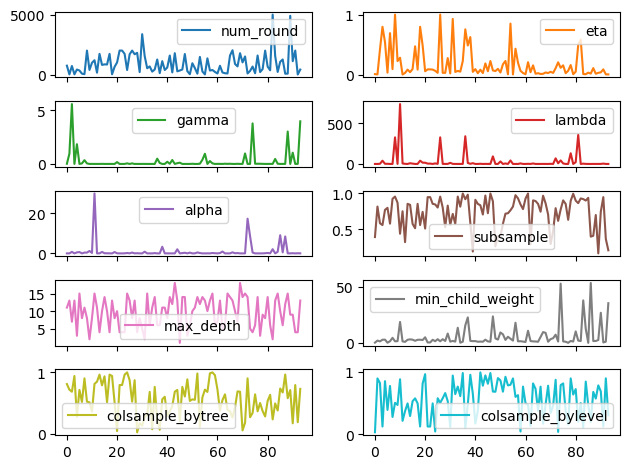

In [8]:
"""
Looking at potential good values for a grid/random search - Examining values of HP for the best config of each task
"""
from python.project_utils import get_best_config_per_task, hyperparameters_data
import matplotlib.pyplot as plt
best_configs = get_best_config_per_task()
best_configs[hyperparameters_data].plot(subplots=True, layout=(5,2))

plt.tight_layout()
plt.show()

In [11]:
display(best_configs[hyperparameters_data].quantile(0.01), best_configs[hyperparameters_data].quantile(0.99))

num_round            15.440000
eta                   0.001093
gamma                 0.000018
lambda                0.000029
alpha                 0.000004
subsample             0.188223
max_depth             1.930000
min_child_weight      0.038333
colsample_bytree      0.042870
colsample_bylevel     0.040134
Name: 0.01, dtype: float64

num_round            4934.070000
eta                     0.999958
gamma                   4.097701
lambda                383.455740
alpha                  18.270835
subsample               0.998929
max_depth              18.000000
min_child_weight       53.032322
colsample_bytree        0.995774
colsample_bylevel       0.985291
Name: 0.99, dtype: float64

In [14]:
from python.taskRegression import get_train_test_distances
from python.taskRegression import get_taskwise_regressors
"""
    Testing distance function
"""
dist = get_train_test_distances()
train_ids = sorted(dist["train_id"].unique())
train_ids
dist
"""
    Testing taskwise regression function
"""
test_id = 16
models = get_taskwise_regressors('taskwise_models.pkl')

In [ ]:
"""
Taskwise regression implementation - moved to taskRegression.py
"""
# from datetime import datetime
# import pickle
# from python.project_utils import training_meta_features, hyperparameters_data
# from xgboost import XGBRegressor
# from skopt import BayesSearchCV
# from sklearn.model_selection import RepeatedKFold
# from skopt.space import Real, Integer
# 
# 
# #Defining search space for model
# search_space = {}
# search_space['eta'] = Real(0,1,'uniform')
# search_space['n_estimators'] = Integer(50,500)
# search_space['max_depth'] = Integer(3,15)
# search_space['learning_rate'] = Real(10e-4,0.1,'log-uniform')
# search_space['colsample_bytree'] = Real(0.3,0.9,'uniform')
# search_space['subsample'] = Real(0.3,1,'uniform')
# 
# #Defining CV method and Bayesian optimisation procedure
# CV_folds = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# search = BayesSearchCV(estimator= XGBRegressor(), search_spaces=search_space, n_jobs=-1, cv=CV_folds, n_iter=10)
# 
# models = {}
# for key in avg_perf.keys():
#     print("Evaluating regressor for dataset with task_id: ",key)
#     print("Start time: ", datetime.now().strftime("%H:%M:%S"))
#     #Defining search space for model
#     current_df = avg_perf[key]
# 
#     #Selecting relevant information for regressor
#     features_train = current_df[hyperparameters_data]
#     target_train = current_df['avg_auc']
# 
#     #Performing the search
#     search.fit(features_train.to_numpy(), target_train.to_numpy())
#     # report the best result
#     print(search.best_score_)
#     print(search.best_params_)
#     # train the model on the best parameters
#     model = XGBRegressor(**search.best_params_)
# 
#     # add the trained model to our collection
#     model.fit(features_train.to_numpy(), target_train.to_numpy())
#     models[key] = model
# 
#     # save all models (done in every loop to not lose progress)
#     with open('taskwise_models.pkl', 'wb') as f:
#         pickle.dump(models, f)
